In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#Reading the cleaned user data (age 18-28)
user_data=pd.read_csv('Final_cleaned_members.csv')
user_data.head()

,Unnamed: 0,Unnamed: 0.1,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,1,10,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816
1,3,15,vUzJAyFEudsnkWwfcLIKT5mJAV+uVRTW2uajCrghFwI=,13,20,male,3,20140410,20170427
2,6,28,ox62m0QICnrFa8/ZM5jJ5WBidWIieREUjUdCiWExLSU=,6,26,female,7,20140118,20170917
3,7,29,95tnnY+Zq8f4jpk5SaDWcmnngD9dFe/OwxAqhss6T8k=,4,25,female,3,20150624,20150701
4,8,30,Der2/cdVesg2+u1UZX/u11dZBM/FWtNl1TlKIK82puw=,11,21,female,9,20140817,20171231


In [3]:
#Reading cleaned songs metadata (all NaN and special characters entries removed)
songs=pd.read_csv('cleanedlength_music_metadata.csv')
songs.head()

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5
0,1,NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=,262749,['139'],['John Legend'],['John Stephens'],['John Stephens'],52.0
1,2,igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=,228717,['465'],['Urban Zakapa'],"['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...","['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...",31.0
2,3,UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=,222649,['1609'],['Calvin Harris'],['Calvin Harris'],['Calvin Harris'],52.0
3,4,nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=,227327,['880'],['Casting Crowns'],"['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...","['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...",52.0
4,5,ZxB4Y6OFY7oArWVqRWofM3g714CWrHbY4ohABjzGLFE=,256052,['1609'],['Robin Schulz'],"['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...","['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...",52.0


count    1.178320e+05
mean     2.405460e+05
std      9.126419e+04
min      4.109000e+03
25%      1.947260e+05
50%      2.292090e+05
75%      2.711610e+05
max      5.083219e+06
Name: 0, dtype: float64

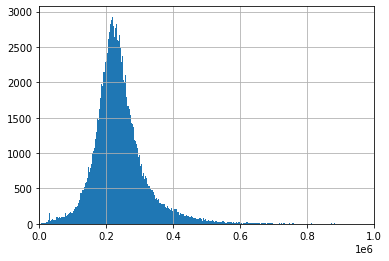

In [201]:
#Histogram on the song lengths
songlength=songs['0']
p=songlength.hist(bins='auto')
p.set_xlim([0,10**6])
songlength.describe()

In [202]:
#Triming the song list based on song length mean+-variance
idx=[]
songlength=songs['0']
for i in enumerate(songlength):
    if (i[1]<149282 or i[1]>331810):
        idx.append(i[0])
songs=songs.drop(idx)
songs.head()
songs.to_csv('cleanedlength_music_metadata.csv')

count     97040.000000
mean     231096.609676
std       41822.597708
min      149300.000000
25%      200234.000000
50%      228006.000000
75%      259317.000000
max      331788.000000
Name: 0, dtype: float64

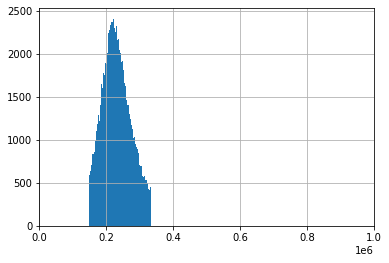

In [4]:
#Histogram on the song lengths
songlength=songs['0']
p=songlength.hist(bins='auto')
p.set_xlim([0,10**6])
songlength.describe()

In [5]:
#Reading test.csv in raw form
test=pd.read_csv('test.csv')
test.dropna()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
5,5,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,radio,Radio,radio
...,...,...,...,...,...,...
2556781,2556781,J6U8R16TeYWhrnl/riJeqc7scOwhoBeYz5+3O7ao1mE=,J0L32tjJ+S9PtXac0SDvLe9wfyUxR7lSPGIBBt0KX+s=,discover,Online playlist more,online-playlist
2556782,2556782,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,DLewxl82pFT6+OgSpGYmN26IayVLtcv2eiJEJBSIWLI=,discover,Online playlist more,online-playlist
2556783,2556783,k87exEzK9b71OyGFQkvMTUFW6ue+j321CsMbwpz3o/w=,A1A04ZUa5dvkPMcPmoHkPD5apjQM3KBhVlcL/SR3S7Q=,my library,Local playlist more,local-playlist
2556784,2556784,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,HGROX/ydkner7ykeMTZjh5oW/b0DbHb0awQIqRNBHIc=,discover,Online playlist more,online-playlist


In [7]:
#Removing the data cooresponding to the users that we filtered away from user data (keeping 18-28yr without NaN)
# idx=[]
# for i in range(test.msno.size):
#     if test.msno[i] not in user_data.msno.tolist():
#         idx.append(i)
# test=test.drop(idx)
test = test.loc[test['msno'].isin(user_data.msno.tolist())]
print(test.head)
test.to_csv('Final_cleaned_test.csv')       

<bound method NDFrame.head of               id                                          msno  \
24            24  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
25            25  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
26            26  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
27            27  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
28            28  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
...          ...                                           ...   
2556783  2556783  k87exEzK9b71OyGFQkvMTUFW6ue+j321CsMbwpz3o/w=   
2556786  2556786  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556787  2556787  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556788  2556788  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556789  2556789  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   

                                              song_id source_system_tab  \
24       YPQayJU1Xtwo9RZ8ou798V/i6JGkrgVPrpPMyXnoBoE=        my library   
25       PrRUipjN6anAeZNOgx

In [25]:
train=pd.read_csv('train.csv')
train.dropna()
train = train.loc[train['msno'].isin(user_data.msno.tolist())]
train.to_csv('Final_cleaned_train.csv')     

In [29]:
#Reading new test file and keeping just msno and song_id for further computation
test=pd.read_csv('Final_cleaned_test.csv')
test_cal=test.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
test_cal.head()
train = pd.read_csv('Final_cleaned_train.csv')
train_cal=train.drop(['source_system_tab','source_screen_name','source_type','target'],axis=1)
train_cal.head()

,Unnamed: 0,msno,song_id
0,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
1,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
2,3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
3,6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=
4,8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=


In [36]:
#Extracting out a list of songs sorted based on the descreasing order of popularity (no of users listening it) 
popularity=train_cal.groupby('song_id').count()
popularity.sort_values(by=['msno'], inplace=True, ascending=False)
len(popularity)

175999

In [38]:
#taking top 80K popular songs
popularsubset=popularity[0:]
popularsongs=popularsubset.index.tolist()
len(popularsongs)

175999

In [42]:
# idx=[]
# for i in range(dataframe['Unnamed: 0'].size):
#     if dataframe['Unnamed: 0'][i] not in popularsongs:
#         idx.append(i)
# songs=dataframe.drop(idx)
songs=pd.read_csv('cleanedlength_music_metadata.csv')
songs.drop(['Unnamed: 0'],axis=1)
songs = songs.loc[songs['Unnamed: 0.1'].isin(popularsongs)]
songs.to_csv('final_songs.csv')
len(songs)

7530

In [45]:
train = train.loc[train['song_id'].isin(songs['Unnamed: 0.1'].tolist())]
train.to_csv('final_train.csv')
test = test.loc[test['song_id'].isin(songs['Unnamed: 0.1'].tolist())]
test.to_csv('final_test.csv')
len(test)

27175

In [40]:
#No of unique artists in the 'popular' songs 
artistlist=songs['2']
b=[]
for i,j in enumerate(artistlist):
    x=j[1:-1].split(', ')
    b.insert(i,x)
blist = [item for sublist in b for item in sublist]
bist=np.unique(np.array(blist))
print(len(bist))

1653


In [41]:
#Unique composers in the 'popular' songs
artistlist=songs['3']
b=[]
for i,j in enumerate(artistlist):
    x=j[1:-1].split(', ')
    b.insert(i,x)
blist = [item for sublist in b for item in sublist]
bist=np.unique(np.array(blist))
print(len(bist))

8204


In [46]:
songs.head()

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5
0,1,NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=,262749,['139'],['John Legend'],['John Stephens'],['John Stephens'],52.0
1,2,igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=,228717,['465'],['Urban Zakapa'],"['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...","['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...",31.0
2,3,UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=,222649,['1609'],['Calvin Harris'],['Calvin Harris'],['Calvin Harris'],52.0
3,4,nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=,227327,['880'],['Casting Crowns'],"['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...","['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...",52.0
4,5,ZxB4Y6OFY7oArWVqRWofM3g714CWrHbY4ohABjzGLFE=,256052,['1609'],['Robin Schulz'],"['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...","['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...",52.0


In [47]:
songs.rename(columns={'Unnamed: 0.1':'song_id','0':'song_length','1':'genre_ids', '2':'artist_name' ,'3':'composer' ,'4':'lyricist','5':'language'}, inplace=True)
songs.head()

,Unnamed: 0,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,1,NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=,262749,['139'],['John Legend'],['John Stephens'],['John Stephens'],52.0
1,2,igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=,228717,['465'],['Urban Zakapa'],"['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...","['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...",31.0
2,3,UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=,222649,['1609'],['Calvin Harris'],['Calvin Harris'],['Calvin Harris'],52.0
3,4,nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=,227327,['880'],['Casting Crowns'],"['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...","['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...",52.0
4,5,ZxB4Y6OFY7oArWVqRWofM3g714CWrHbY4ohABjzGLFE=,256052,['1609'],['Robin Schulz'],"['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...","['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...",52.0


In [48]:
songs.to_csv('final_songs.csv')

In [ ]:
#Removing the songs from test data that we filtered away
idx=[]
for i in range(test.msno.size):
    if test.msno[i] not in songs.msno.tolist():
        idx.append(i)
test=test.drop(idx)
test.to_csv('Final_cleaned_test.csv')

In [ ]:
#Cleaning train data using the final userdata and songs data to make sure that 
#these have just those songs and users which we final continued with
train=pd.read_csv('train.csv')
train.dropna()
idx=[]
for i in range(train.msno.size):
    if train.msno[i] not in user_data.msno.tolist():
        idx.append(i)
train=train.drop(idx)
idx=[]
for i in range(train.msno.size):
    if train.msno[i] not in songs.msno.tolist():
        idx.append(i)
train=train.drop(idx)
train.to_csv('Final_cleaned_train.csv')